# THE SPARKS FOUNDATION

## Prediction using Supervised ML

## TASK #1 :Predict the percentage of an student based on the no. of study hours.

### AUTHOR: KUNAL MEHTA


#### Importing all the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn import metrics  
%matplotlib inline

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [4]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
print("\033[1mFirst 5 rows of the dataset\033[0;0m")

data.head()

First 5 rows of the dataset


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
print("\033[1mChecking basic information of the dataset\033[0;0m")
print('')
data.info()

Checking basic information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
print("\033[1mThere is a positive correlation between number of hours studied by a student and scores obtained\033[0;0m")

data.corr()

There is a positive correlation between number of hours studied by a student and scores obtained


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
print("\033[1mChecking the summary statistics of the data\033[0;0m")

data.describe()

Checking the summary statistics of the data


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
print("\033[1m Checking for null values in the dataset\033[0;0m")
data.isnull().sum()

 Checking for null values in the dataset


Hours     0
Scores    0
dtype: int64

Text(0.5, 1.0, 'Scatter Plot- Hours v/s Scores')

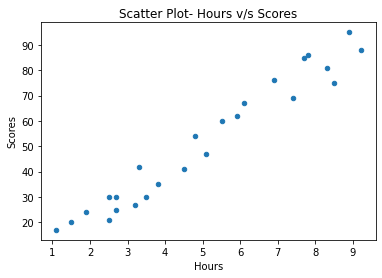

In [10]:
data.plot(kind="scatter", x ='Hours' , y ='Scores')
plt.title("Scatter Plot- Hours v/s Scores")


#### From the above scatter plot we can see that, there is a possitive correlation between variables. 

#### Data Preparation

In [11]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

#### Training the model

In [13]:
l_reg = LinearRegression()  
l_reg.fit(X_train, Y_train) 

LinearRegression()

#### Plotting Regression line

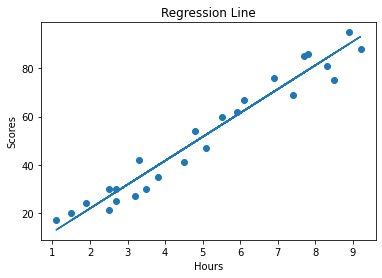

In [14]:
line = l_reg.coef_*X+l_reg.intercept_

plt.scatter(X, Y)
plt.plot(X, line);
plt.xlabel("Hours")
plt.ylabel('Scores')
plt.title("Regression Line")
plt.show()

#### Predicting the Model

In [15]:
print(X_test) 
predict_Y = l_reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


#### Comparing Actual v/s Predicted Scores

In [16]:
data_1 = pd.DataFrame({'Actual': Y_test, 'Predicted': predict_Y})  
data_1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
hrs = [9.25]
pred = l_reg.predict([hrs])
print("\033[1mAns:Predicted Score is a Student Strudies 9.25 hrs/day is \033[0;0m {}".format(pred[0].round(2)))

Ans:Predicted Score is a Student Strudies 9.25 hrs/day is  93.69


#### Three Evaluation Metrics for Regression Model

In [18]:
print("\033[1m Mean Absolute Error:\033[0;0m", metrics.mean_absolute_error(Y_test, predict_Y).round(2)) 
print("\033[1m Mean Squared Error:\033[0;0m", metrics.mean_squared_error(Y_test, predict_Y).round(2)) 
print("\033[1m Root Mean Squared Error:\033[0;0m", np.sqrt(metrics.mean_squared_error(Y_test, predict_Y)).round(2))


 Mean Absolute Error: 4.18
 Mean Squared Error: 21.6
 Root Mean Squared Error: 4.65
